<a href="https://colab.research.google.com/github/hectorpilo/bootcamp-ds-sonda/blob/Proyecto1/Core_Clasificacion_Basada_en_arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización**

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

In [1]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')
# Importamos pandas con el nombre "pd" por buena practica.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importamos una bbdd en formato excel y lo guardamos en una variable.
path = "/content/drive/MyDrive/BBDD/retail_sales_dataset.csv"
df_1 = pd.read_csv(path)

Mounted at /content/drive


In [2]:
#Nombre de las columnas existentes en el array, le asigne una variable para luego llamarla más facil.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**✔ Crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.**

In [3]:
df_1["Ingreso Total"] = df_1["Quantity"] * df_1["Price per Unit"] #creacion de columna ingreso total.

In [4]:
#Maximo
max_price = df_1["Ingreso Total"].max()
#Minimo
min_price = df_1["Ingreso Total"].min()
max_price,min_price #valores maximos y minimos de la columna ingreso total.


(2000, 25)

**Normalización**:
Cuando se tienen datos y se distancian mucho entre ellos, es mejor normalizar los datos para que se puedan ajustar a la grafica. Un caso comun es usar los valores minimos y maximos de una columna. Tambíen aveces se usan los logaritmos, entre otras... Para esta ocación usaré los maximos y minimos.

In [ ]:
df_1["Normalizado"] = (df_1["Ingreso Total"]- min_price)/(max_price - min_price)

**✔ Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).**

pd.cut , dentro de todas sus funciones puede segmentar. Sin embargo, para su segmentación realizaré el calculo de un "paso", que es la diferencia entre el rango que hay entre maximo y minimo y dividido por la cantidad de categorias, que en este caso son 3.

In [ ]:
#calculo del rango
rango = df_1["Ingreso Total"].max() - df_1["Ingreso Total"].min()
rango

1975

In [ ]:
#Calculo del paso
paso = rango/3  #3 por que es, alta, media y baja.
paso

658.3333333333334

In [ ]:
df_1["Clasificación Venta"] = pd.cut(df_1["Ingreso Total"],   #creacion de nueva columna
                                   bins=[-1, 683.33, 1341.66, 2000], #-1 por que así parte de 0 hasta 683, de 683 a 1341 y de 1341 a 2000.
                                   labels=["Baja", "Media", "Alta"]) #aqui le atribuye a cada segmento su etiqueta.

**✔ Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.**

Para esto agruparé las columnas de product category,total amount y date.

In [ ]:
df_1.info() #Miramos que date sea del tipo datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Transaction ID       1000 non-null   int64   
 1   Date                 1000 non-null   object  
 2   Customer ID          1000 non-null   object  
 3   Gender               1000 non-null   object  
 4   Age                  1000 non-null   int64   
 5   Product Category     1000 non-null   object  
 6   Quantity             1000 non-null   int64   
 7   Price per Unit       1000 non-null   int64   
 8   Total Amount         1000 non-null   int64   
 9   Ingreso Total        1000 non-null   int64   
 10  Normalizado          1000 non-null   float64 
 11  Clasificación Venta  1000 non-null   category
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 87.2+ KB


In [ ]:
#Como no era datetime, se tansforma a datetieme.
df_1["Date"] = pd.to_datetime(df_1["Date"])

In [ ]:
df_grupo1 = df_1.groupby(["Product Category", "Date"])["Ingreso Total"].sum().reset_index() #agrupo dos columnas, indico que columnas sumar, aplico la suma por grupo y el reset para darle valor de columna.
df_grupo1

,Product Category,Date,Ingreso Total
0,Beauty,2023-01-01,1500
1,Beauty,2023-01-02,25
2,Beauty,2023-01-03,600
3,Beauty,2023-01-04,1090
4,Beauty,2023-01-05,50
...,...,...,...
650,Electronics,2023-12-27,600
651,Electronics,2023-12-28,75
652,Electronics,2023-12-29,100
653,Electronics,2023-12-31,50


In [ ]:
df_1.groupby(["Product Category", "Date"])["Ingreso Total"].agg(["sum","mean","count","min","max","std","var"]).reset_index()


,Product Category,Date,sum,mean,count,min,max,std,var
0,Beauty,2023-01-01,1500,1500.0,1,1500,1500,NaN,NaN
1,Beauty,2023-01-02,25,25.0,1,25,25,NaN,NaN
2,Beauty,2023-01-03,600,600.0,1,600,600,NaN,NaN
3,Beauty,2023-01-04,1090,545.0,2,90,1000,643.467171,414050.0
4,Beauty,2023-01-05,50,50.0,1,50,50,NaN,NaN
...,...,...,...,...,...,...,...,...,...
650,Electronics,2023-12-27,600,600.0,1,600,600,NaN,NaN
651,Electronics,2023-12-28,75,37.5,2,25,50,17.677670,312.5
652,Electronics,2023-12-29,100,100.0,1,100,100,NaN,NaN
653,Electronics,2023-12-31,50,50.0,1,50,50,NaN,NaN


**✔ Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.**

Calcularé las ventas mayores a 1000 de los productos por categoria, para este caso como ya tengo la columna ingresos totales, haré una función que establezca un filtro para ventas mayores a 1000. Luego, llamaré a la función para aplicarla a la columna Product Category.

In [ ]:
def contar_altas(ventas):  #creación de la función.
    return (ventas["Ingreso Total"] > 1000).sum()
df_1.groupby("Product Category").apply(contar_altas)


<ipython-input-24-3169813509>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_1.groupby("Product Category").apply(contar_altas)


,0
Product Category,
Beauty,48
Clothing,52
Electronics,53


In [ ]:
#Calculo de la desviación de cada venta respecto a la de su grupo.
#Creación de la función.
def desviacion_respecto_media(grupo): #grupo es el parametro
    media = grupo["Ingreso Total"].mean() #la variable media es el promedio del parametro trabajando en la columna ingreso total.
    grupo["Desviación respecto a la media"] = grupo["Ingreso Total"] - media
    return grupo

#aplicación de la función
df_1.groupby("Product Category").apply(desviacion_respecto_media)

<ipython-input-27-3353100051>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_1.groupby("Product Category").apply(desviacion_respecto_media)


Transaction ID       Date Customer ID  Gender  Age  \
Product Category                                                           
Beauty           0                 1 2023-11-24     CUST001    Male   34   
                 4                 5 2023-05-06     CUST005    Male   30   
                 5                 6 2023-04-25     CUST006  Female   45   
                 11               12 2023-10-30     CUST012    Male   35   
                 20               21 2023-01-14     CUST021  Female   50   
...                              ...        ...         ...     ...  ...   
Electronics      988             989 2023-12-28     CUST989  Female   44   
                 991             992 2023-08-21     CUST992  Female   57   
                 992             993 2023-02-06     CUST993  Female   48   
                 998             999 2023-12-05     CUST999  Female   36   
                 999            1000 2023-04-12    CUST1000    Male   47   

                     Product Category  Quantity  Price per Unit  Total Amount  \
Product Category                                                                
Beauty           0             Beauty         3              50           150   
                 4             Beauty         2              50           100   
                 5             Beauty         1              30            30   
                 11            Beauty         3              25            75   
                 20            Beauty         1             500           500   
...                               ...       ...             ...           ...   
Electronics      988      Electronics         1              25            25   
                 991      Electronics         2              30            60   
                 992      Electronics         3              50           150   
                 998      Electronics         3              50           150   
                 999      Electronics         4              30           120   

                      Ingreso Total  Normalizado Clasificación Venta  \
Product Category                                                       
Beauty           0              150     0.063291                Baja   
                 4              100     0.037975                Baja   
                 5               30     0.002532                Baja   
                 11              75     0.025316                Baja   
                 20             500     0.240506                Baja   
...                             ...          ...                 ...   
Electronics      988             25     0.000000                Baja   
                 991             60     0.017722                Baja   
                 992            150     0.063291                Baja   
                 998            150     0.063291                Baja   
                 999            120     0.048101                Baja   

                      Desviación respecto a la media  
Product Category                                      
Beauty           0                        -317.47557  
                 4                        -367.47557  
                 5                        -437.47557  
                 11                       -392.47557  
                 20                         32.52443  
...                                              ...  
Electronics      988                      -433.78655  
                 991                      -398.78655  
                 992                      -308.78655  
                 998                      -308.78655  
                 999                      -338.78655  

[1000 rows x 13 columns]

# **Análisis Descriptivo y Visualización**
* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
* Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
* Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
* Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
* Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [ ]:
#Calculo de estadisticas descriptivas básicas para comprender mejor las caracteristicas de los datos.
df_1.describe(include='all').T #usar el "include=all" incorpora otros datos como count y unique.

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,NaN,NaN,NaN,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,NaN,NaN,NaN,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Customer ID,1000,1000,CUST1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,NaN,NaN,NaN,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Total Amount,1000.0,NaN,NaN,NaN,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
Ingreso Total,1000.0,NaN,NaN,NaN,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632


##**Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave**

**Distribución de edad de clientes.**

<Axes: xlabel='Age', ylabel='Count'>

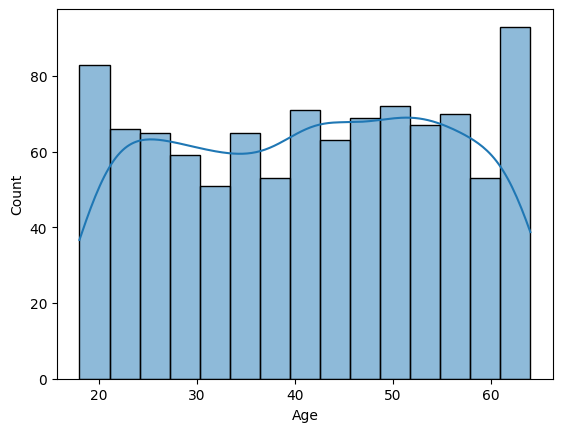

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df_1, x='Age', bins=15, kde=True)

**Distribución de Edad por Género**

<Axes: xlabel='Gender', ylabel='Age'>

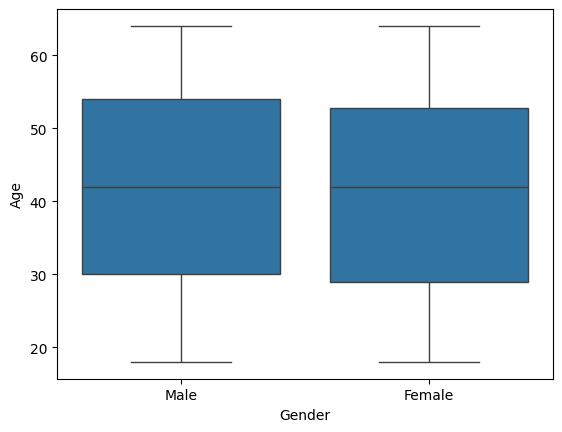

In [ ]:
sns.boxplot(data=df_1, x='Gender', y='Age')

**Distribución de Cantidad Vendida**

<Axes: xlabel='Quantity', ylabel='Count'>

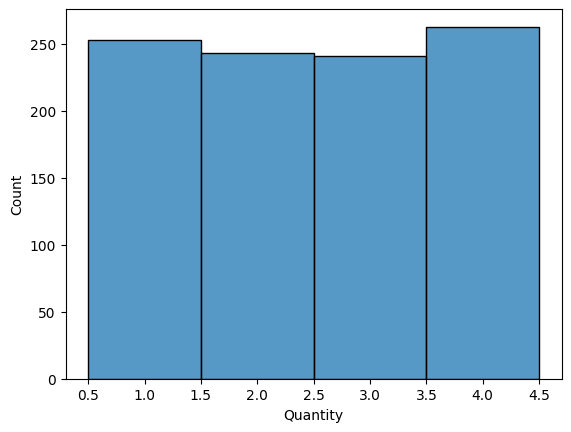

In [ ]:
sns.histplot(data=df_1, x='Quantity', bins=5, discrete=True)

**Cantidad Vendida por Género**

<Axes: xlabel='Gender', ylabel='Quantity'>

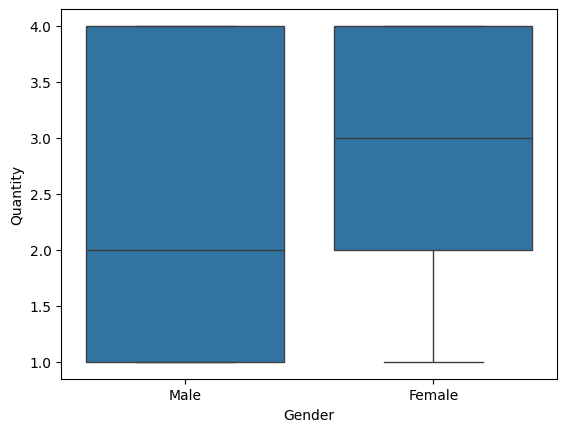

In [ ]:
sns.boxplot(data=df_1, x='Gender', y='Quantity')

# **Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.**

In [ ]:
# Asegurarse que la columna 'Date' esté en formato de fecha
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [ ]:
# Agrupamos por fecha y sumamos el total de ventas de cada día
ventas_por_fecha = df_1.groupby('Date')['Total Amount'].sum().reset_index()

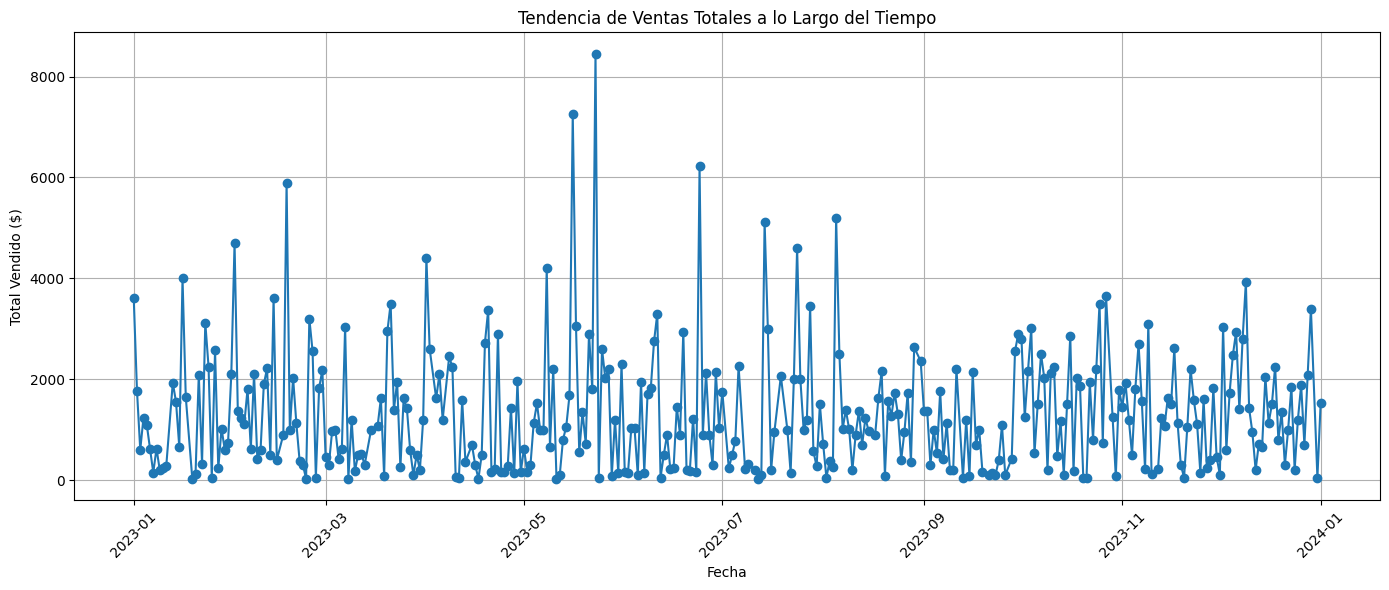

In [ ]:
# Creamos el gráfico de línea
plt.figure(figsize=(14, 6))
plt.plot(ventas_por_fecha['Date'], ventas_por_fecha['Total Amount'], marker='o', linestyle='-')
plt.title('Tendencia de Ventas Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Vendido ($)')
plt.xticks(rotation=45)  # Gira las fechas para mejor lectura
plt.tight_layout()
plt.grid(True)
plt.show()

Grafico de disperción normalizado vs Edad

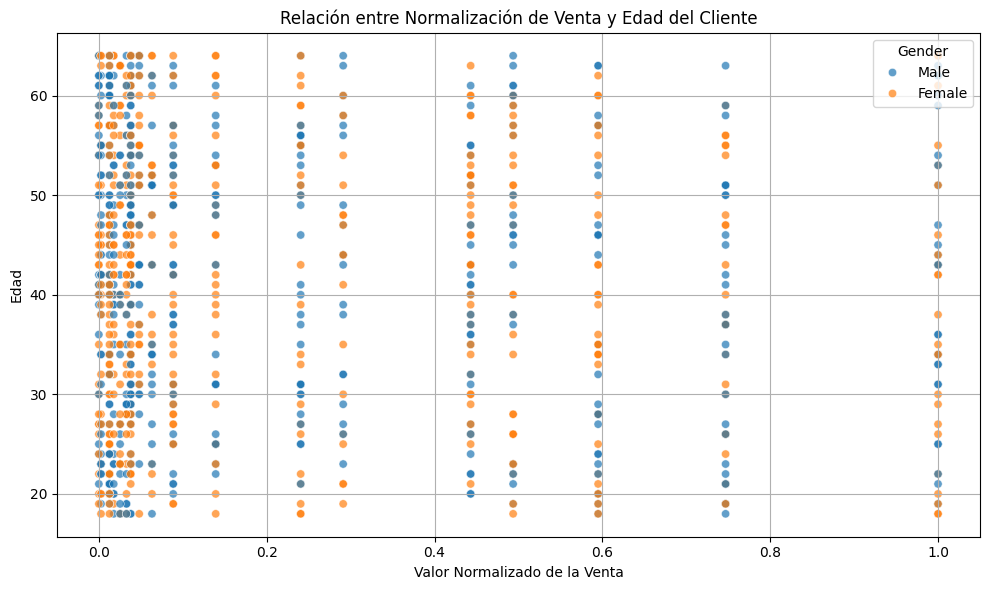

In [ ]:
# Gráfico de dispersión: Normalizado vs Edad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='Normalizado', y='Age', hue='Gender', alpha=0.7)
plt.title("Relación entre Normalización de Venta y Edad del Cliente")
plt.xlabel("Valor Normalizado de la Venta")
plt.ylabel("Edad")
plt.grid(True)
plt.tight_layout()
plt.show()

Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

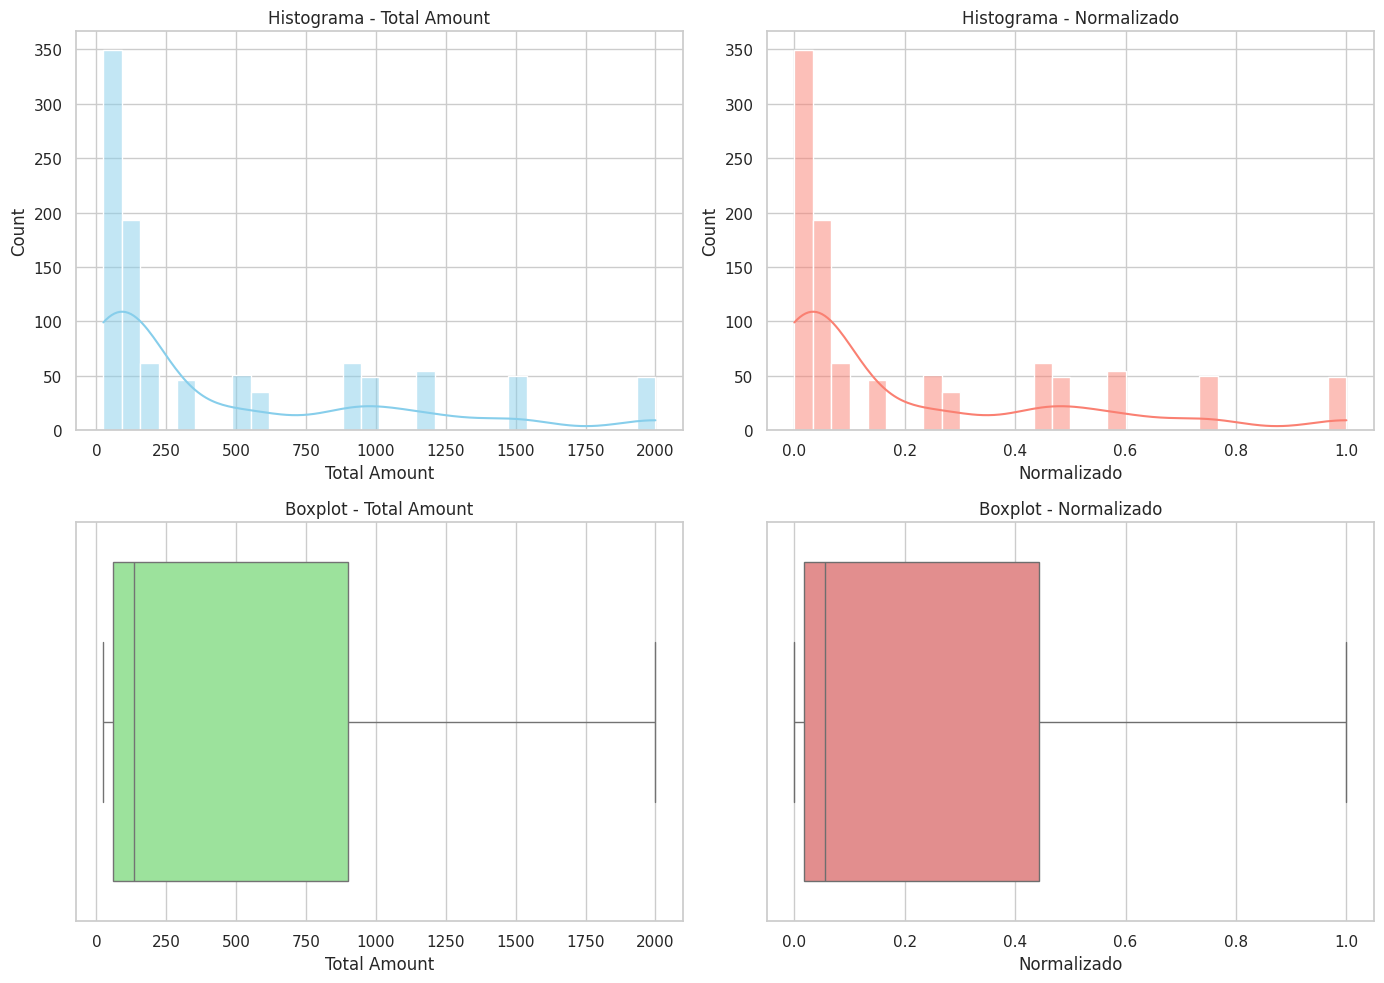

In [ ]:
# Configurar estilo de gráficos
sns.set(style='whitegrid')

# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# === TOTAL AMOUNT ===

# Histograma
sns.histplot(data=df_1, x='Total Amount', bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histograma - Total Amount')

# Boxplot
sns.boxplot(data=df_1, x='Total Amount', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Boxplot - Total Amount')

# === NORMALIZADO ===

# Histograma
sns.histplot(data=df_1, x='Normalizado', bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Histograma - Normalizado')

# Boxplot
sns.boxplot(data=df_1, x='Normalizado', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Boxplot - Normalizado')

# Ajustar layout final
plt.tight_layout()
plt.show()


# **Exploración de Datos Avanzada**
* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
* Crea subplots para comparar diferentes variables clave.
* Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

# **1. Análisis de correlación con Mapa de calor**

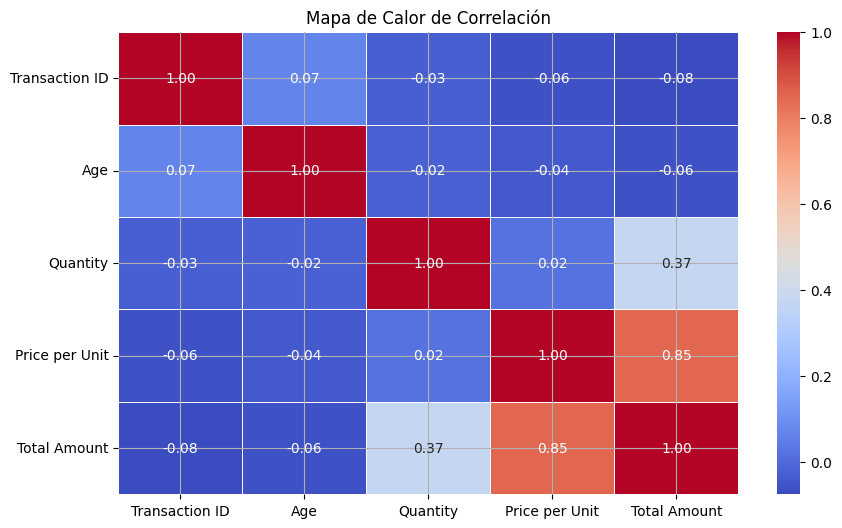

In [ ]:
# Seleccionamos solo las columnas numéricas para hacer la correlación
corr = df_1.corr(numeric_only=True)

# Creamos el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.grid(True)
plt.show()

# **2. Crear subplots para comparar variables clave**

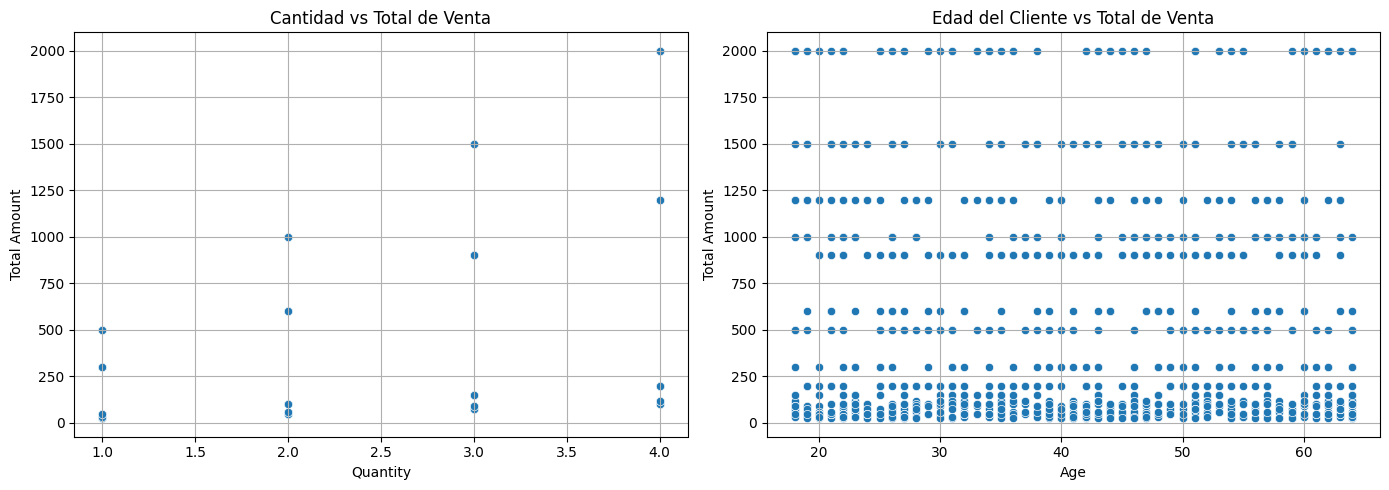

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1
sns.scatterplot(data=df_1, x='Quantity', y='Total Amount', ax=axs[0])
axs[0].set_title('Cantidad vs Total de Venta')
axs[0].grid(True)

# Subplot 2
sns.scatterplot(data=df_1, x='Age', y='Total Amount', ax=axs[1])
axs[1].set_title('Edad del Cliente vs Total de Venta')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# **3. Añadir leyendas, anotaciones y flechas**

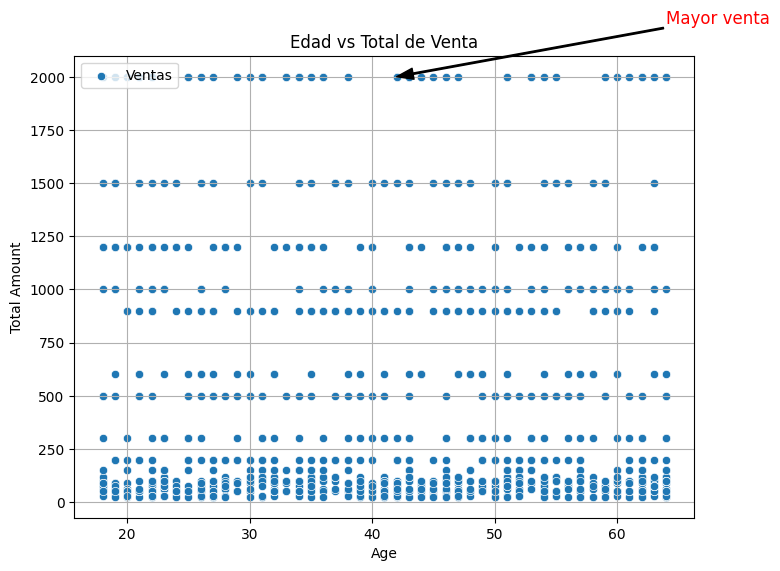

In [ ]:
# Encontrar el punto de mayor venta
max_row = df_1[df_1['Total Amount'] == df_1['Total Amount'].max()]
x_max = max_row['Age'].values[0]
y_max = max_row['Total Amount'].values[0]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_1, x='Age', y='Total Amount')

# Anotación y flecha
plt.annotate('Mayor venta', xy=(x_max, y_max), xytext=(x_max+22, y_max+250),
             arrowprops=dict(facecolor='black', width=1, headwidth=8),
             fontsize=12, color='red')

plt.title("Edad vs Total de Venta")
plt.grid(True)
plt.legend(['Ventas'], loc='upper left')
plt.show()


# **Proyecto 1 - Parte Final (CORE)**

Como se trata de un CORE realizado, volveré a revisar información.

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   Ingreso Total     1000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 78.3+ KB


In [53]:
# 1. Copia de seguridad del DataFrame original
df = df_1.copy()

# 2. Convertimos la columna 'Date' a tipo datetime para extraer información útil
df['Date'] = pd.to_datetime(df['Date'])

# 3. Creamos nuevas columnas a partir de la fecha
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# 4. Eliminamos columnas que no aportan valor al modelo
df.drop(['Transaction ID', 'Customer ID', 'Total Amount', 'Date'], axis=1, inplace=True)

# 5. Definimos variable objetivo (target)
y = df['Ingreso Total']

# 6. Definimos variables predictoras (features)
X = df.drop(['Ingreso Total'], axis=1)

# 7. Verificamos que las columnas en X sean las esperadas
cat_cols = ['Gender', 'Product Category']
num_cols = ['Age', 'Quantity', 'Price per Unit', 'Year', 'Month', 'Day', 'Weekday']

# Confirmamos que están todas
assert set(cat_cols + num_cols) == set(X.columns), "❌ Las columnas de X no coinciden con lo esperado"

# 8. Preprocesamiento con ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# 9. Modelos a evaluar
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# 10. Creamos un pipeline por cada modelo
pipelines = {}
for nombre, modelo in modelos.items():
    pipelines[nombre] = Pipeline([
        ('preprocesamiento', preprocessor),
        ('modelo', modelo)
    ])

# 11. Evaluación con cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

print("📊 Evaluación de modelos (RMSE promedio con CV=5):")
for nombre, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse = -scores.mean()
    print(f'{nombre} → RMSE promedio: {rmse:.2f}')


📊 Evaluación de modelos (RMSE promedio con CV=5):
Regresión Lineal → RMSE promedio: 216.17
Árbol de Decisión → RMSE promedio: -0.00
Random Forest → RMSE promedio: -0.00
KNN → RMSE promedio: 142.11
XGBoost → RMSE promedio: 0.00


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo sin cross_val_score (ejemplo con Random Forest)
modelo = Pipeline([
    ('preprocesamiento', preprocessor),
    ('modelo', RandomForestRegressor(random_state=42))
])
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métrica directa (RMSE)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("✅ RMSE en test (Random Forest):", rmse)

# Compara predicción vs real
print("Predicciones:", y_pred[:5])
print("Reales:", y_test.values[:5])

✅ RMSE en test (Random Forest): 0.0
Predicciones: [1500.  100.  300.  100. 2000.]
Reales: [1500  100  300  100 2000]


El modelo está haciendo un overfiting

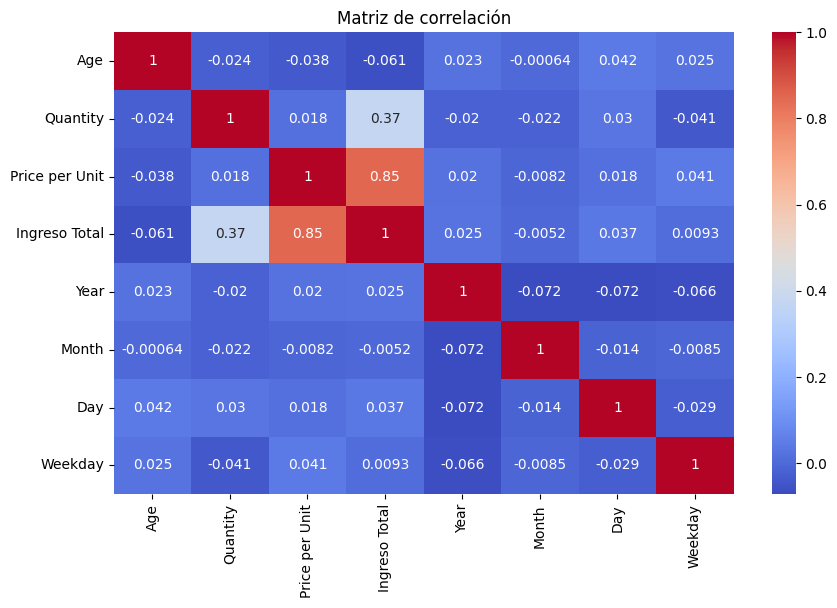

In [56]:
# Solo para columnas numéricas
df_corr = df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


📌 Conclusión del análisis de correlación
La variable Ingreso Total tiene:

🔴 Correlación de 0.85 con Price per Unit

🔵 Correlación de 0.37 con Quantity

📐 Esto indica que:

Ingreso Total ≈ Quantity × Price per Unit

Y probablemente es exactamente igual en el dataset. Por eso los modelos como árboles y XGBoost aprenden la fórmula de inmediato y tienen un RMSE de 0.

In [57]:
# 1. Copia original desde df_1
df_original = df_1.copy()

# 2. Convertimos la columna 'Date' a datetime
df_original['Date'] = pd.to_datetime(df_original['Date'])

# 3. Creamos columnas de fecha
df_original['Year'] = df_original['Date'].dt.year
df_original['Month'] = df_original['Date'].dt.month
df_original['Day'] = df_original['Date'].dt.day
df_original['Weekday'] = df_original['Date'].dt.weekday

# 4. Creamos copia intermedia antes de corregir data leakage
df_before_fix = df_original.drop(['Transaction ID', 'Customer ID', 'Total Amount', 'Date'], axis=1)

# 🔍 Esta copia aún contiene 'Price per Unit' que genera fuga de información

# 5. Creamos versión corregida para modelamiento (sin Price per Unit)
df_model = df_before_fix.drop(['Price per Unit'], axis=1)

# 6. Definimos target y features
y = df_model['Ingreso Total']
X = df_model.drop(['Ingreso Total'], axis=1)

# 7. Columnas categóricas y numéricas esperadas
cat_cols = ['Gender', 'Product Category']
num_cols = ['Age', 'Quantity', 'Year', 'Month', 'Day', 'Weekday']

# Validamos que no falte nada
assert set(cat_cols + num_cols) == set(X.columns), "❌ Columnas no coinciden"

# 8. Preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# 9. Modelos
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# 10. Pipelines
pipelines = {}
for nombre, modelo in modelos.items():
    pipelines[nombre] = Pipeline([
        ('preprocesamiento', preprocessor),
        ('modelo', modelo)
    ])

# 11. Evaluación
from sklearn.model_selection import cross_val_score
import numpy as np

print("📊 Evaluación sin fuga de datos (RMSE promedio con CV=5):")
for nombre, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse = -scores.mean()
    print(f'{nombre} → RMSE promedio: {rmse:.2f}')


📊 Evaluación sin fuga de datos (RMSE promedio con CV=5):
Regresión Lineal → RMSE promedio: 522.79
Árbol de Decisión → RMSE promedio: 763.50
Random Forest → RMSE promedio: 543.47
KNN → RMSE promedio: 560.14
XGBoost → RMSE promedio: 603.78


Para la matriz de confusion, consideré Clase 1 (Ingreso alto): si Ingreso Total > mediana y Clase 0 (Ingreso bajo): si Ingreso Total <= mediana

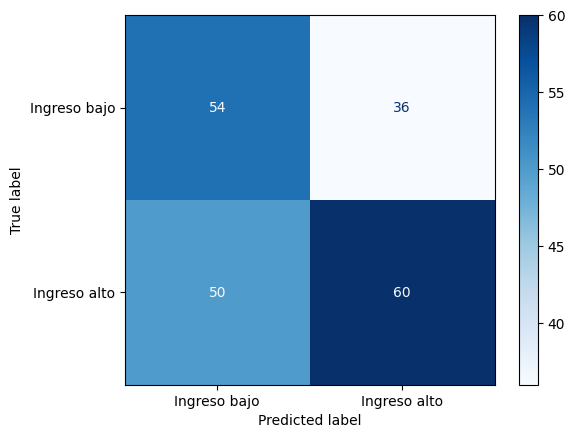

In [58]:
# 1. Crear variable binaria a partir de la mediana del ingreso
umbral = y.median()
y_binaria = (y > umbral).astype(int)

# 2. División train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binaria, test_size=0.2, random_state=42)

# 3. Clasificador con preprocesamiento
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('preprocesamiento', preprocessor),
    ('modelo', RandomForestClassifier(random_state=42))
])

# 4. Entrenar y predecir
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 5. Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ingreso bajo", "Ingreso alto"])
disp.plot(cmap='Blues')


La matriz de confusión muestra que el modelo clasificó correctamente 54 casos de ingresos bajos y 60 de ingresos altos, lo que indica un desempeño moderado. Sin embargo, también cometió 36 falsos positivos (casos que predijo como ingresos altos pero eran bajos) y 50 falsos negativos (predijo ingresos bajos cuando en realidad eran altos). Esto sugiere que el modelo tiende a confundirse especialmente al identificar ingresos altos reales, lo que podría reflejar una distribución compleja o solapada entre las clases en los datos. Aunque el modelo tiene cierto poder predictivo, hay espacio para mejorar su capacidad de discriminación, especialmente en términos de recall para ingresos altos.

# **Curva ROC y AUC**

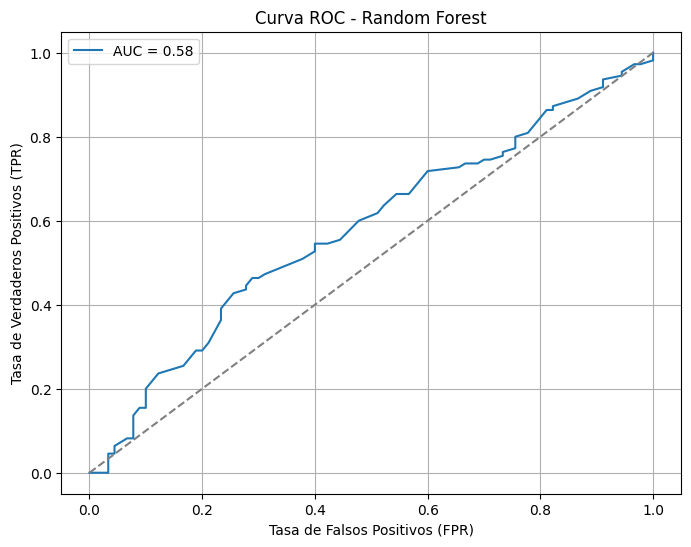

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtenemos probabilidades en vez de clases duras
y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilidad de clase 1 (ingreso alto)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC
auc = roc_auc_score(y_test, y_probs)

# Gráfico
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea base
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.grid()
plt.show()


La curva ROC muestra el desempeño del modelo de Random Forest para clasificar entre ingresos altos y bajos. La línea azul representa la capacidad del modelo para distinguir entre ambas clases, mientras que la línea gris punteada indica el rendimiento de un clasificador aleatorio (AUC = 0.5). En este caso, el área bajo la curva (AUC) es de 0.58, lo que indica un rendimiento ligeramente mejor que el azar, pero aún muy limitado en su capacidad discriminativa. Esto sugiere que el modelo no está capturando patrones lo suficientemente claros para diferenciar de forma efectiva los ingresos altos de los bajos, por lo que sería recomendable mejorar la calidad de las variables, probar otros modelos, ajustar hiperparámetros o reestructurar el problema.